<h3>The dataset is the result of an online survey of people in the data science field. They may be students, hobbyists, professionals, and everything in between. Information regarding education, training, salary, location, age, etc. have been collected though I'll be focusing on a smaller subset of features.</h3>

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [203]:
path = 'survey_results_public.csv'

In [204]:
data = pd.read_csv(path)
data.head(3)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN


In [205]:
data.shape

(83439, 48)

In [206]:
data.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [207]:
features = ['MainBranch', 'Employment', 'Country', 'US_State', 'EdLevel', 'LearnCode', 'YearsCode', 'YearsCodePro', 'DevType', 'Age', 'ConvertedCompYearly']

In [208]:
df = data[features]
df.head(3)

,MainBranch,Employment,Country,US_State,EdLevel,LearnCode,YearsCode,YearsCodePro,DevType,Age,ConvertedCompYearly
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,"Secondary school (e.g. American high school, G...",Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",25-34 years old,62268.0
1,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,18-24 years old,NaN
2,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,18-24 years old,NaN


In [209]:
df.groupby('Country')['Country'].count().sort_values(ascending=False)[0:10]

Country
United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
France                                                   2708
Brazil                                                   2254
Poland                                                   1805
Netherlands                                              1772
Italy                                                    1666
Name: Country, dtype: int64

<h3>Taking the responses from the top 10 countries that received survery responses. I'll explore age group, education level, years coding, and yearly compensation.</h3>

In [210]:
top_10 = df[df['Country'].isin(df.groupby('Country')['Country'].count().sort_values(ascending=False)[0:10].index)]
top_10.head(3)

,MainBranch,Employment,Country,US_State,EdLevel,LearnCode,YearsCode,YearsCodePro,DevType,Age,ConvertedCompYearly
1,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,18-24 years old,NaN
4,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Friend or family member,17,10,"Developer, desktop or enterprise applications;...",25-34 years old,NaN
5,I am a student who is learning to code,"Student, part-time",United States of America,Georgia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,18-24 years old,NaN


In [211]:
top_10['Age'].unique()
top_10['Age'].replace('Prefer not to say', 'Declined', inplace=True)

C:\Users\Jimmy Lin\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [212]:
top_10['Age'].astype(str)

1        18-24 years old
4        25-34 years old
5        18-24 years old
6               Declined
8        25-34 years old
              ...       
83433    25-34 years old
83434    25-34 years old
83436    25-34 years old
83437    25-34 years old
83438    18-24 years old
Name: Age, Length: 49116, dtype: object

In [213]:
age_mapping = {str(value): str(value).split(" ")[0] for value in top_10['Age'].unique()}
top_10['Age'].replace(age_mapping,inplace=True)
top_10['Age'].replace({'Under': '18-', '65': '65+'}, inplace=True)

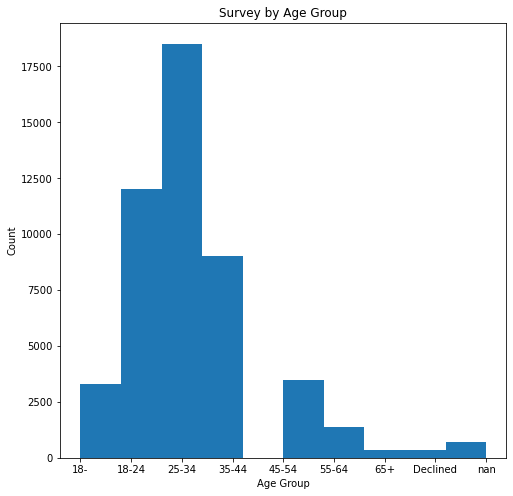

In [214]:
plt.figure(figsize=(8,8))
plt.hist(sorted(top_10['Age'].values.astype(str)))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survey by Age Group')
plt.show()

<h3>From this survey, we see that the predominant age group is made up of people age 25 through 34.</h3>

In [215]:
top_10['YearsCode'].replace({'Less than 1 year': 0, 'More than 50 years': 50}, inplace=True)
top_10['YearsCode'].fillna(0, inplace=True)

C:\Users\Jimmy Lin\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [216]:
top_10['YearsCode'].astype(int)

1         7
4        17
5         0
6         3
8         6
         ..
83433    15
83434     6
83436    10
83437     5
83438    14
Name: YearsCode, Length: 49116, dtype: int32

<Figure size 432x288 with 0 Axes>

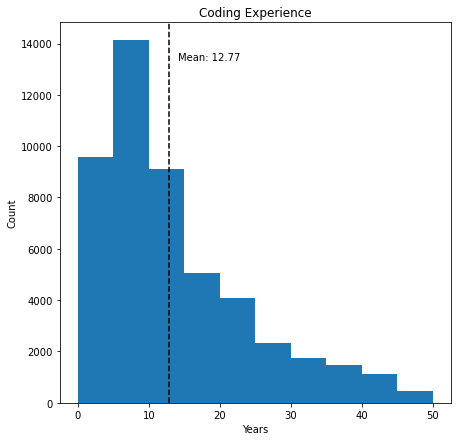

In [282]:
plt.clf()
x = sorted(top_10['YearsCode'].fillna(0).values.astype(int))
plt.figure(figsize = (7,7))
plt.hist(x,bins=10)
plt.axvline(np.array(x).mean(), linestyle='dashed', color='k')
min_ylim, max_ylim = plt.ylim()
plt.text(np.array(x).mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(np.array(x).mean()))
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Coding Experience')
plt.show()

<h3>Most people have 10 years or less in coding, and on average 12 years of coding experience.</h3>

In [218]:
top_10['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       nan, 'Professional degree (JD, MD, etc.)'], dtype=object)

In [219]:
educ_map = {str(x): str(x).split(' (')[0] for x in top_10['EdLevel'].unique()}

In [220]:
top_10['EdLevel'].replace(educ_map, inplace=True)

In [221]:
top_10['EdLevel'].replace({'Primary/elementary school': 'Grade School', 'Secondary school': 'Grade School', 'Some college/university study without earning a degree': 'Uncompleted Degree', 'Other doctoral degree': 'Doctoral/Professional Degree', 'Professional degree': 'Doctoral/Professional Degree'},inplace=True)

In [222]:
pie_data = top_10.groupby('EdLevel')['EdLevel'].count().values
pie_data

array([ 1312, 21347,  2172,  6832, 10648,   891,  5728], dtype=int64)

In [223]:
pie_labels = np.array(top_10.groupby('EdLevel')['EdLevel'].count().index)
pie_labels

array(['Associate degree', 'Bachelor’s degree',
       'Doctoral/Professional Degree', 'Grade School', 'Master’s degree',
       'Something else', 'Uncompleted Degree'], dtype=object)

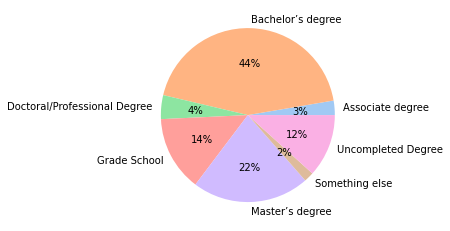

In [275]:
plt.clf()
colors = sns.color_palette('pastel')[0:7]
plt.pie(pie_data, labels=pie_labels, colors=colors, autopct='%.0f%%')
plt.show()

<h3>Nearly 75% of respondants have a bachelor's degree or higher.</h3>

In [267]:
years_comp = top_10[['YearsCode','ConvertedCompYearly']].fillna(0)

In [270]:
from sklearn.preprocessing import MinMaxScaler

In [271]:
log = MinMaxScaler()
log_comp = log.fit_transform(years_comp[['ConvertedCompYearly']])

In [272]:
years_comp['log_comp']= log_comp

In [273]:
scatter_data = years_comp.astype(float)

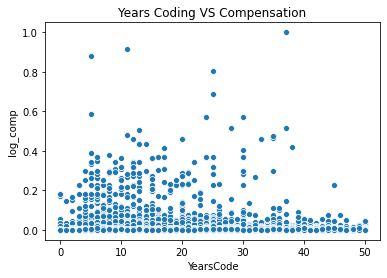

In [284]:
plt.clf()
#fig, ax = plt.subplots()
sns.scatterplot(data=scatter_data, x='YearsCode', y='log_comp')
ax.set(ylim=(0,1000000))
plt.title('Years Coding VS Compensation')
plt.show()

<h3>There is potential to earn quite a bit of compensation regardless of years coding. </h3>